# Hands-on Lab 6: System ID
### EECS 16B: Designing Information Devices and Systems II, Spring 2022

Updated by Steven Lu, Kaitlyn Chan (2021)

Updated by Steven Lu (2022)


## <span style="color:navy">Table Of Contents</span>
-----

* [Introduction](#intro)
* [Part 1: Sensor Verification](#part1)
* [Part 1.5: Protecting your Launchpad](#part1.5)
* [Part 2: Changing to Battery Power](#part2)
* [Part 3: Open Loop Data Collection and Parameter Estimation](#part3)
* [Part 4: Determining the Operating Point](#part4)

<a id='intro'></a>
## <span style="color:navy">Introduction</span>
-----

With our circuits for enabling S1XT33N to drive around and pick up your voice, it's now time to start working on getting S1XT33N to drive in a straight line. Before we can do that, however, we need information on how "good" S1XT33N's motors actually are when they're driving on the ground; we want to know how sensitive they are to changes in the input, how much friction they experience, etc. Using that information, we can then determine what input PWM duty cycles to feed the motors so that they move at the same speed. 

For this lab, we will focus on collecting that data and derive a linear model for the system. Note that this isn't perfect; in reality, the physics of all the forces at work in the system is nonlinear. However, for simplicity, we will approximate the system with a linear model, and accept that there will be some error, which we will correct for in the future. In the next lab, we will be taking the data we collect in this lab to realize our goal of S1XT33N driving in a straight line.

**Remember to document all design choices you made and explain them in the final lab report.**


## Lab Note
* [Lab Note](https://drive.google.com/file/d/1NBo2JBhBadvLUVhgV_KzU3Yn4yURmO8N/view?usp=sharing)

Review the lab note. The lab note provides a technical review of the concepts covered in lab as well as theoretical connections. **You should read the lab notes before your lab section.** They serve as a review and will be helpful as a reference during section.


## Pre-Lab

### Complete the pre-lab assignment before doing the lab. For hands-on students, submit your answers to the Gradescope assignment "[Hands-on] Pre-Lab 6: System ID". Please make sure that you submit to the correct assignment. Pre-Lab 6 is due on Sunday, March 6 at 11:59pm. No late submissions will be accepted.


## <span style="color:red">**IMPORTANT: The car's orientation**
You should have the car assembled. The castor wheel (small white wheel) is the back of the car. **When the car is moving, the castor wheel should always be at the back.**

## <span style="color:red">**IMPORTANT: Secure castor wheel**
This lab requires data collection that will be used to control the car in later parts of the project. Therefore, it is very important that the conditions in your environments for data collection and controls be matched as closely as possible. Otherwise, the model and data you use to control your car later will be inaccurate. **We highly recommend you secure the castor wheel now for the rest of the project with either tape or wires.** The wheel should be aligned straight with the car and the sides of the wheel and metal parts need to be restrained so that the wheel only rotates and does not spin in any other directions.
    

### Help Request Link: https://links.eecs16b.org/lab-help-sp22

<a id='part1'></a>

## <span style="color:navy">Part 1: Sensor Verification</span>
-----

Before we begin, let's make sure your encoders are still working from Lab 3, as we will heavily depend on them for when we collect our data in the rest of this lab.
### <span style="color:navy">Encoder Verification</span>


### Materials:
- Launchpad + USB cable
- Car with encoders installed
- 2 plastic encoder wheels (black plastic wheel with lots of rectangular holes)
- Power supply

In general, there are two major types of error in sensing the car's trajectory. The first is noise in the sensor signals. The second is from mechanical differences between the two sides of the car.

In this section we will test for and fix the first type of noise. The mechanical type primarily affects performance over long distances, so we can compensate for it after implementing closed-loop control.

### Tasks: 
1. Connect the Launchpad's USB.
2. **Connect one of the ground pins on the Launchpad to the ground rail of your breadboard.**
3. Power your motors with 9V from the +25V channel on the power supply (connect it to the switch like from Lab 3). **Set the current limit to 0.4 A**. 
4. Power your regulators' inputs ("Regulator 9V Rail") with the same +25V channel on the power supply as well.
5. **Connect the input resistor (the 1.5k ohm resistor) of the left motor's driver circuit to `P2.0` and the input resistor of the right motor's driver circuit to `P1.5`.** (Connect the pins to the ends of the resistors that are NOT connected to the base pin of the BJT).
6. **If your encoders are powered properly, the LEDs on each one should blink when you pass something through the encoders or turn the wheels slowly.** 
7. If you've disconnected them, connect pins `P6.2` and `P6.3` to the outputs of the resistive dividers of the left and right encoders, respectively.
8. Remove the encoder wheels (the plastic disk with holes in it) if they are on the car. Upload **`encoder_test_0_ticks.ino`** to the Launchpad.
9. Open the serial monitor.
10. **Set the baud rate to `38400`**.
11. Press reset (RST) button on Launchpad.
12. Follow the instructions on the serial monitor.
    - **Your car wheels are going to move. Make sure that you hold the car above the table/ground. Don't let your car jump off the table.**
    - `P2.1` is the bottom left button of the Launchpad.
    - The test will conduct 4 phases: both wheels at rest, only left wheel driving, only right wheel driving, and both wheels driving.
    - If your encoders are functioning properly, the serial monitor should print "Success" or "Success if encoder wheels are off" after each phase, and display all 0s (or at least no more than a few ticks) for the ticks per phase. Note that if your car is mis-wired, this could be a false negative.
    - This diagnostics message will be followed up by a long and repeating string of the actual values measured during the duration of the program. If you want to look at just the encoder diagnostics, make sure to untick `Autoscroll` in the bottom left of the Serial Monitor window.
13. Attach the encoder wheels as shown below.
    - If it is on, make sure to remove the paper sticker from your car frame if there is one (yes, it does come off) before you attach the encoders.
    - If some of the holes on the encoder wheel were not fully cut out, use a screwdriver to push the material out.
14. Re-run the tests. If your car is connected correctly, **the tests should show several hundred encoder ticks** after all the tests have been run, ruling out a false negative. You should also see it print "Success" or "Failure if encoder wheels are off. Success if encoder wheels are on" after each test.

<img width="400px" src="images/proj-car-encoder2.jpg">




<a id='part1.5'></a>

## <span style="color:navy">Part 1.5: Protecting your Launchpad</span>
-----

Aside from never simultaneously powering your Launchpad from two sources, the following steps are practices you should follow to avoid frying your Launchpad. You will know your Launchpad is fried if you can no longer see the device under Device Manager > Ports. 

### Good Practices:
- <span style="color:red"> **Never leave input pins (i.e. P1.5, P2.0, P6.2, P6.3) connected to your Launchpad unless the Launchpad is powered.**
    - This is because we do not want any signals entering the input pins if the Launchpad itself is not on. The maximum voltage on the Launchpad can tolerate on its pins depends on whether or not the Launchpad is powered. When the Launchpad isn't powered, the maximum voltage is ~0.2V, so leaving any signal connected to the pins can risk frying the pin and/or the Launchpad.
- Make sure the ground pin of your Launchpad is connected to your breadboard ground.
- Ideally, the general procedure for interacting with your Launchpad is:
    a) Power your Launchpad (whether through USB or the 5V regulator). No input pins should be connected to the Launchpad.
    b) Connect the breadboard ground to your Launchpad ground.
    c) Connect any input pins from your Launchpad to the breadboard. 
- If you find plugging in your input pins each time annoying, you can leave them attached to the Launchpad **as long as you unplug the 9V input to your regulators before you disconnect power from your Launchpad.**

<a id='part2'></a>

## <span style="color:navy">Part 2: Changing to Battery Power</span>
-----

### Materials
- Two 9V rechargeable batteries + battery leads (knotted)

Now we want to use 9V batteries to allow the car to run on the ground. 

<span style="color:red">***In general, if you are testing things at your lab station (e.g. testing if your motors are working), use the power supply for 9V.*** Only use the 9V batteries if away from lab benches. The battery does not contain a lot of energy and the motors draw a lot of power. If you leave it running, it will only last a little over an hour. If the voltage of the battery drops below 7.8V, you will need a new battery. Remove your battery leads when you're not using your batteries to prevent an accidental short that heats up your batteries.
    
### A note on the car's batteries:
You may want to velcro or tape down your batteries symmetrically to the back of your car. This will balance the weight distribution and help with controls in the next lab.

### Tasks:
1. Disconnect the power supply's 9V source from the breadboard.
  - **Never leave both the 9V from the power supply and the battery connected at the same time. Don't do it.**
2. **Disconnect your regulator 9V rail from the motor 9V rail if you've connected them**. We will be using 2 separate batteries, one for the regulators and one for the motors.
3. Knot your battery leads as shown in the image below.
    - This will drastically decrease the chance that the leads will accidentally short and kill your battery.
    - Take the leads off the batteries after lab as well to decrease chances of a short.

<img width="200px" src="images/proj-batt-lead.jpg">

4. Connect one battery to the switch (for motors) and the other to the voltage regulators.
   - When using the batteries, the red is 9V and black is ground.
   - The grounds of the 9V battery leads should go to the ground rails of the breadboard.

5. **Use your oscilloscope or multimeter again to check that the output of your regulators are as expected and nothing was shorted.**

6. Up until now, the Launchpad has been powered through the computer via the USB. <span style="color:red">**Disconnect the USB cable that is powering the Launchpad.** Powering the MSP by both the 5V from the voltage regulator and the USB can increase the odds of MSP frying.

7. <span style="color:red"> **Never simultaneously power the MSP with both the computer (USB) and the 5V through your breadboard.** </span>
    - **DON'T DO IT!** If you leave both connected for too long, the computer will not recognize your Launchpad due to power overload at the COM port and your Launchpad will likely get fried and stop working.

### Summary:

At any point, your car should be powered with either of the following two configurations:

1. **Tethered Configuration**: When uploading Launchpad code or downloading data to the computer: 

<img width="700px" src="images/PowerDiagram2.png">

2. **Mobile configuration**: When running the car away from the computer: 

<img width="700px" src="images/PowerDiagram1.png">



<a id='part3'></a>
## <span style="color:navy">Part 3: Open Loop Data Collection and Parameter Estimation</span>
-----

Now that we have verified our encoders' functionality, we will collect the data by uploading the sketch **`dynamics_data.ino`**. Glance through the sketch - it records the position of each wheel while varying the input signal $u[i]$ linearly from HIGH_PWM to LOW_PWM and back up. The sampling period is $T_s = 500\mathrm{ms}$. A long sampling period is used to minimize error due to quantization, which manifests as rounding error from measuring only integer encoder ticks.

**Important: For this first test, make sure that you are using the first set of 5 parameters in code block `SID1`** (abbreviated from System ID 1). These parameters will sweep through a range of PWM values, from 200 to 100 and back to 200 (the maximimum value a PWM can have is 255 and minimum is 0), while collecting 2 samples per PWM. The car will start fast, slow down, and speed back up during the test (it's possible that the car may stop in the middle before driving again if a PWM of 100 is not enough to get it to drive).

### 3.1. About Data Collection
1. We will being using **`dynamics_data.ino`** to collect data for our car and read it to the serial monitor.
2. Upon being uploaded to the MSP, **`dynamics_data.ino`** has two functions depending on the **`WRITE`** variable at the top of the code:
    - If **`WRITE == 1`** - The car upon having the leftmost bottom button pressed will run and collect data, then write it into nonvolatile (permanent) memory called flash, which will survive between resets and power supply removal, unlike volatile memory like RAM. The collected data will be overwritten if data collection is run again.
    - If **`WRITE == 0`** - The car upon having its leftmost bottom button pressed will read data collected from its last run that is stored in flash and output it onto the Serial Monitor.


Some items to remember when collecting data:
- Remember that the MSP needs power from 5V pin if not connected via USB cable to the computer. **However, don't connect both, as this fries your Launchpad.**
- Look for a large space to run your car. The long hallways outside Cory 125 are good locations. You want to try to minimize the number of collisions it makes with the objects or walls around it for the best data.
- **Secure your MSP** to your car so that it does not fall off while the car is moving! **Be careful to not short any Launchpad pins with other electrical components on your car like the breadboard and encoders. They should not be touching.**

Some debugging tips:

- If your motors don't run, make sure you've flip the switch to connect the motors to 9V.
- **The leftmost button is unresponsive at times, so you may have to press it multiple times. You will know you have succeeded in making the MSP bend to your will if the LEDs blink.** If things are still unresponsive, press the reset (RST) button on the Launchpad.
- If your car makes *very* tight circles (ie: radius less than 1 ft), talk to your GSI! Some quick fixes may be:
    - Check to see if your motor wheels are turning in the right direction (the back of the car is the castor wheel).
    - Making sure the castor wheel (the white wheel that swivels) is aligned with your car (straight, and not turned at an angle) before running dynamics_data.ino. You may need to accomplish this by restraining the sides of the wheel with either wires or tape.
    - Using a smaller range of PWM values (i.e. 90-150 instead of 100-200)
    - If you fry one of your PWM pins, you can use one of the other PWM pins, which are `P1.4`, `P1.5`, `P2.0`, `P2.4`, and `P2.5`.

### 3.2. Coarse Data Collection

<img width="400px" src="images/example_coarse_data.png">

We want to get a general idea of not only how your motors react to different input PWMs, but also figure out if there are any mechanical differences that we may need to account for in the future. To do this, we will allow our car to run for a while given a large range of input PWMs.

The example plot above shows an example of extreme differences between two wheels. The "ascending" plot is when the car is speeding up (as it increases from `LOW_PWM` to `HIGH_PWM`) and the descending plot is the opposite. _What is wrong with the plot above? Are the motors working properly throughout the entire run?_


#### Tasks:
1. Upload `dynamics_data.ino` onto your Launchpad with `WRITE == 1`.
2. Unplug the USB and plug in the 5V pin on your Launchpad to power it with the batteries. Remember you cannot leave both the USB and the 5V pin connected at the same time or your Launchpad will kick the bucket and fry.
3. Place your car on the ground and push button `P2.1` (bottom leftmost button) once you're ready and let the car run.
    - Your car will run for a pretty long time, so be prepared. If your car is about to crash into something, spin it around and change its trajectory so that it does not. Having collisions will mess up your data.
    - Your car will most likely not go straight. Think about why this is.
4. Once it finishes and comes to a stop (after completing the slowdown and speedup), flip the switch to disconnect the motors from power and bring your car back to your computer. Unplug the 5V pin from your Launchpad and plug in the USB. Upload `dynamics_data.ino` again, but this time with `WRITE == 0`.
5. Push button `P2.1` and copy the data from the serial monitor and paste it into the text file called **`data_coarse.txt`** (the file can be found in the lab folder). You may need to turn off `Autoscroll`.
    - The PWM range of the collected data should be from 100 to 200.
    - The data is printed in lines as comma separated 3-tuples. 
    - Copy and paste, ONLY these 3-tuples, nothing else. Don't include column headers.
    - Your data should look something like this (although with more data points and much different data):
    <img width="400px" src="images/data_coarse_example.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

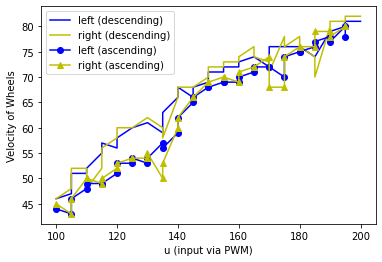

In [3]:
with open('data_coarse.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])

# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]


u = data[:, 0].reshape((-1, 1)) # duty cycle
left_des, left_asc = np.array_split(vleft, 2)

right_des, right_asc = np.array_split(vright, 2)

u_des, u_asc = np.array_split(u, 2)

plt.plot(u_des, left_des, 'b-',  u_des, right_des, 'y-')
plt.plot(u_asc, left_asc, 'b-o',  u_asc, right_asc, 'y-^')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
labels = ("left (descending)", "right (descending)",
          "left (ascending)" , "right (ascending)")
plt.legend(labels, loc=0)
plt.show()

### 3.3. Fine Data Collection

Now we'll collect data appropriate for least-squares to find a linear approximation for the behavior of your motors. In normal operation, the car only has to run within a small range of velocities, so we collect more samples at each PWM, over a smaller PWM range. 

#### Tasks:
1. **Comment out the first set of 5 parameters and uncomment the second set in code block `SID1`.**

2. **Set *LOW_PWM* and *HIGH_PWM*** so that the chosen PWM range yields a velocity graph that looks (more or less) linear on your coarse plot from the previous step.
    - Aim for a length of about 50-60 PWM values (e.g. 140 to 190).
    - Our goal is that both wheels are able to acheive the same velocities for some two PWM input values in the range, so choose your range accordingly. 

3. Follow the steps above to run the program again. If your car is making *very* tight circles refer to Task 3.1's debugging tips.
    
4. This time, copy the data to a text file called **`data_fine.txt`**, instead of `data_coarse.txt`.

5. Perform least-squares regression on your data as outlined in the sections below entitled **Least-Squares Regression** and **Evaluate Your Fit**.

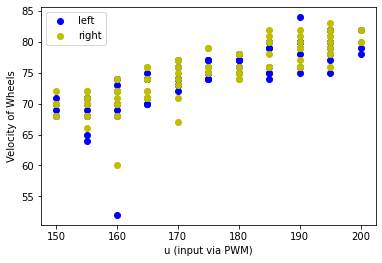

In [4]:
with open('data_fine.txt', 'r') as file:
    data = np.array([[int(num) for num in line.strip().split(',')] for line in file.readlines()])
    
# compute velocity from distances
vleft  = data[:, 1]
vright = data[:, 2]

u = data[:, 0].reshape((-1, 1)) # duty cycle

plt.plot(u, vleft, 'bo',  u, vright, 'yo')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)
plt.show()

### 3.4. Least-Squares Regression

Now that we have some data, we can try performing least-squares regression. Try to think about what least-squares problem we are solving, what equations are we using, and what the variables we are solving for mean.

#### Tasks:
1. Write a function that takes the data as parameters, performs least squares, and extracts the parameters. The functions [`np.hstack`](https://numpy.org/doc/stable/reference/generated/numpy.hstack.html), [`np.ones`](https://numpy.org/doc/stable/reference/generated/numpy.ones.html), [`np.shape`](https://numpy.org/doc/stable/reference/generated/numpy.shape.html), [`np.linalg.lstsq`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) will be helpful here.
    - If you are having trouble figuring out how to setup the least-squares problem, check the lab note for some helpful insight.
    
2. Call the function once for each wheel.

3. Record the values of $\theta$ and $\beta$ for each wheel.

In [5]:
# Write a function that formulates and performs least squares
# and returns theta and beta for one wheel
def identify_parameters(u, v):
    # Returns (theta, beta) for given (u, v)
    # YOUR CODE HERE
    size_U = len(u)
    a2 = np.ones(size_U)*-1
    A = np.column_stack((u,a2))
   
    x = np.linalg.lstsq(A,v)
    return x[0][0], x[0][1]

# extract parameters, call your function here
theta_left, beta_left = identify_parameters(u, vleft) # 0, 0
theta_right, beta_right = identify_parameters(u, vright) # 0, 0

print("float theta_left = {:.4g};".format(theta_left))
print("float theta_right = {:.4g};".format(theta_right))
print("float beta_left = {:.4g};".format(beta_left))
print("float beta_right = {:.4g};".format(beta_right))

float theta_left = 0.2686;
float theta_right = 0.2564;
float beta_left = -27.54;
float beta_right = -30.28;


/tmp/ipykernel_682/1187444355.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A,v)


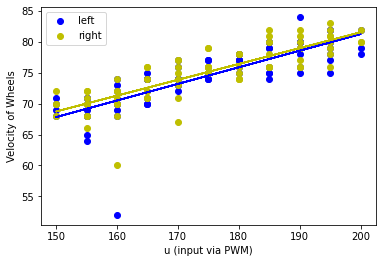

In [6]:
# plot results of least squares fit 
u = u.reshape(-1)
vleft_LS = theta_left*u-beta_left
vright_LS = theta_right*u-beta_right
plt.plot(u, vleft, 'bo',  u, vright, 'yo', u, vleft_LS, 'b-', u, vright_LS, 'y-')
plt.xlabel("u (input via PWM)")
plt.ylabel("Velocity of Wheels")
plt.legend(("left", "right"), loc=0)

### 3.5. Evaluate Your Fit

#### Tasks:
1. **Inspect the linearity of this plot and the coarse data plot.**
    - Make sure that the fitted lines have some y values in common! That way we know both wheels can attain the same speed.
    - If they don't, the plot for the operating point in Part 4 will fail. You will need to recollect your fine data with a different, and likely wider, PWM range.
2. **If you think a different range of PWM may be more linear, change HIGH_PWM and LOW_PWM in the .ino file.**
    - Be careful so your car does not run too close to the minimum or maximum PWM (0 and 255).
    - If our control scheme saturates (e.g. maxes at 255) an input, the car is much harder to control.
3. Run the simulation below.

To test that we have estimated the parameters accurately, we will simulate the model using the parameters we have found. When we compare the simulated data with the collected data, we expect them to match up pretty well. 

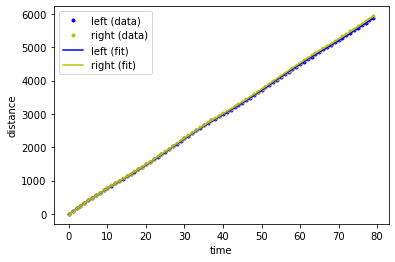

In [7]:
# model for simulation 
def sim(d0, u, theta, beta):
    d = np.zeros(len(u)+1)
    d[0] = d0
    for t in range(len(u)):
        d[t+1] = d[t] + theta*u[t] - beta
    return d
def get_distances_from_velocities(v):
    d = np.zeros(len(u) + 1)
    d[0] = 0
    for t in range(len(u)):
        d[t+1] = d[t] + v[t] 
    return d
        
# plot simulated trajectories 

dleft = get_distances_from_velocities(vleft)
dright = get_distances_from_velocities(vright)

dleft_simulated  = sim(0, u, theta_left, beta_left)
dright_simulated = sim(0, u, theta_right, beta_right)
plt.plot(dleft, 'b.', 
         dright, 'y.',
         dleft_simulated, 'b-', 
         dright_simulated, 'y-',
        )
plt.xlabel("time")
plt.ylabel("distance")
plt.legend(("left (data)", "right (data)", "left (fit)", "right (fit)"), loc='upper left')

<a id='part4'></a>
## <span style="color:navy">Part 4: Determining the Operating Point</span>
-----

In general, each wheel may have a different range of velocities, illustrated here.


<img src="./images/partial_overlap_lsq.png">


In order for the car to drive straight, the wheels must be moving at the same velocity. However, the motors (and hence the wheels) have different achievable velocity ranges, so we need to set the operating point to a velocity achievable by both wheels. A good choice of target velocity is the midpoint of the overlapping range of velocity. The below cell will calculate this. We will use this value in the next lab (Lab 7: Controls), along with the theta and beta values calculated earlier for both wheels.

Velocity range = [68.7, 81.3]

Operating point:
float v_star = 75.0;


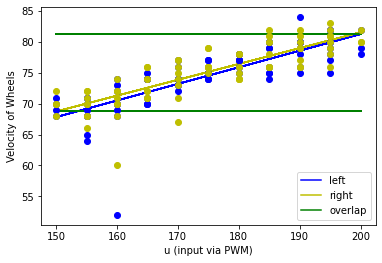

In [8]:
min_vel = max(min(vleft_LS), min(vright_LS))
max_vel = min(max(vleft_LS), max(vright_LS))

if ((min(vleft_LS) > max(vright_LS)) or (min(vright_LS) > max(vleft_LS))):
    print('Error: Velocity ranges of left and right wheels do not overlap. Recollect data_fine with a wider PWM range')
else:
    print('Velocity range = [{:0.1f}, {:0.1f}]'.format(min_vel, max_vel))
    midpoint = (min_vel+max_vel)/2
    print('\nOperating point:\nfloat v_star = {:.1f};'.format(midpoint))

    u = u.reshape(-1)
    vleft_LS = theta_left*u-beta_left
    vright_LS = theta_right*u-beta_right
    plt.plot(u, vleft_LS, 'b-', u, vright_LS, 'y-')
    for i in (min_vel, max_vel):
        plt.plot(u, 0*u + i, 'g-')
    plt.plot(u, vleft, 'bo',  u, vright, 'yo')
    plt.xlabel("u (input via PWM)")
    plt.ylabel("Velocity of Wheels")
    plt.legend(("left", "right", "overlap"), loc=0)

## <span style="color:#ba190f">CHECKOFF</span>
-----

- **Have all questions and plots completed in this notebook.**

- **Show your TA your data collection and parameters. Your TA will double check your parameters and graphs.**
    - Show your data collection and parameters (theta and beta values).
    - Show your operating point graph and that your wheels have overlapping velocities.

- **Be prepared to answer conceptual questions about the lab.**
 
- Think about the following questions for checkoff:
    - What is the difference between `data_coarse.txt` and `data_fine.txt`?
    - How did we come to finding theta and beta? What do they represent?
    - Why did we have to model each wheel seperately?
    - How could we use this model to make our car drive straight?

### Checkoff Request Link: https://links.eecs16b.org/lab-checkoff-sp22


**After checkoff, please:**

- <span style="color:#ff0000"> **DO NOT DISMANTLE ANY CIRCUITS FROM YOUR PROJECT BREADBOARD! You will need them for the rest of the project!**</span>

- Store all your electrical components in a neat and organized manner.
- Make sure that all components that you received in your lab kit are stored safely for use in future labs.
- **Clean up your lab bench areas! This includes turning off all lab equipment, putting all lab equipment probes back on the racks, returning all components you borrowed, putting the rest of the components back in your lab kits neatly, and throwing away any stripped wires.**

- ### **Remember what each part of your circuit is for (Record this in a Google doc or somewhere else safe). You will need to write summaries for both the midterm and final lab reports!**
